# Assignment 1
## Question `1` (K-Nearest Neighbour)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

### Instructions:
1.   Assignment must be implemented using python notebook only (Colab , VsCode , Jupyter etc.)
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for algorithms as well (sklearn etc). You are not however allowed to directly use classifier models.
3.   The performance of the model will hold weightage but you will also be graded largely for data preprocessing steps , explanations , feature selection for vectors etc.
4.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

### The Dataset
The dataset is avaible in the zip file which is a collection of *11099 tweets*. The data will be in the form of a csv file. The ground truth is also given in the zip file which corresponds to whether a tweet was popular or not. Since the task involves selecting features yourself to vectorize a tweet , we suggest some data analysis of the columns you consider important.
<br><br>

### The Task
You have to build a classifier which can predict the popularity of the tweet, i.e , if the tweet was popular or not. You are required to use **KNN** algorithm to build the classifier and cannot use any inbuilt classifier. All columns are supposed to be analyzed , filtered and preprocessed to determine its importance as a feature in the vector for every tweet (Not every column will be useful).<br>
The Data contains the **raw text of the tweet**(in the text column) as well as other **meta data** like likes count , user followers count. Note that it might be useful to **create new columns** with useful information. For example, *number of hashtags* might be useful but is not directly present as a column.<br>
There are 3 main sub parts:
1. *Vectorize tweets using only meta data* - likes , user followers count , and other created data
2. *Vectorize tweets using only it's text*. This segment will require NLP techniques to clean the text and extract a vector using a BoW model. Here is a useful link for the same - [Tf-Idf](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d). Since these vectors will be very large , we recommend reducing their dimensinality (~10 - 25). Hint: [Dimentionality Reduction](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491). Please note that for this also you are allowed to use libraries.

3. *Combining the vectors from above two techinques to create one bigger vector*
<br>


Using KNN on these vectors build a classifier to predict the popularity of the tweet and report accuracies on each of the three methods as well as analysis. You can use sklearn's Nearest Neighbors and need not write KNN from scratch. (However you cannot use the classifier directly). You are expected to try the classifier for different number of neighbors and identify the optimal K value.

## Import necessary libraries

In [2]:
# https://www.kaggle.com/code/varun97531/notebookadaeac6e88
import pandas as pd
import numpy as np
import json

## Load and display the data

In [25]:
#your code here
data = pd.read_csv("Tweets.csv")
x_train = data
y = pd.read_csv("ground_truth.csv")
data.head()

created_at            id        id_str  \
0  Tue Jul 31 13:34:34 +0000 2018  1.024290e+18  1.024290e+18   
1  Tue Jul 31 13:34:14 +0000 2018  1.024290e+18  1.024290e+18   
2  Tue Jul 31 13:34:40 +0000 2018  1.024290e+18  1.024290e+18   
3  Tue Jul 31 13:34:27 +0000 2018  1.024290e+18  1.024290e+18   
4  Tue Jul 31 13:34:28 +0000 2018  1.024290e+18  1.024290e+18   

                                                text  truncated  \
0  RT @EdwardTHardy: The 7th US Circuit Court of ...      False   
1  RT @VenomMovie: The world has enough superhero...      False   
2  RT @FutbolBible: Teachers vs Students match &a...      False   
3  RT @mashable: Someone from 'The Office' actual...      False   
4  RT @_missj0hnson: Iâ€™m at Starbucks asking fo...      False   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [{'text': 'Venom', 'indices': [64...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   
3  {'hashtags': [], 'symbols': [], 'user_mentions...   
4  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                            metadata  \
0  {'iso_language_code': 'en', 'result_type': 're...   
1  {'iso_language_code': 'en', 'result_type': 're...   
2  {'iso_language_code': 'en', 'result_type': 're...   
3  {'iso_language_code': 'en', 'result_type': 're...   
4  {'iso_language_code': 'en', 'result_type': 're...   

                                              source  is_quote_status  \
0  <a href="http://twitter.com/download/android" ...            False   
1  <a href="http://twitter.com/download/android" ...            False   
2  <a href="http://twitter.com/download/iphone" r...            False   
3  <a href="http://twitter.com" rel="nofollow">Tw...            False   
4  <a href="http://twitter.com/download/android" ...            False   

   retweet_count  ...  lang         user_name user_screen_name  \
0            113  ...    en       Sherry Wahl   queenfancygirl   
1           5902  ...    en  Kay Khairil ðŸŒ      ikaykhairil   
2           3745  ...    en  Charlie Hamilton         ch100897   
3             10  ...    en       Mike Santos    mikesantosx71   
4          25306  ...    en             Soots  DaAverageDingus   

  user_followers_count  user_friends_count  user_listed_count  \
0                  153                 264                  7   
1                  780                 382                 12   
2                  255                 246                  1   
3                 2419                2428                  4   
4                  314                 722                  7   

                  user_created_at user_favourites_count  user_verified  \
0  Thu Mar 18 19:16:31 +0000 2010                 32984          False   
1  Wed Mar 17 03:27:51 +0000 2010                  6648          False   
2  Sun Mar 03 09:23:03 +0000 2013                  5426          False   
3  Thu May 25 14:37:29 +0000 2017                  5993          False   
4  Tue Mar 15 01:14:02 +0000 2011                  6285          False   

   user_statuses_count  
0                31308  
1                87272  
2                 1731  
3                 2153  
4                33503  

[5 rows x 21 columns]

In [26]:
print(data.shape)
print(data.columns.shape)
print(y.shape)
data.columns

(11099, 21)
(21,)
(11099, 1)


Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'is_quote_status', 'retweet_count',
       'favorite_count', 'lang', 'user_name', 'user_screen_name',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_created_at', 'user_favourites_count', 'user_verified',
       'user_statuses_count'],
      dtype='object')

In [27]:
print(data['text'][0])
data.head()

RT @EdwardTHardy: The 7th US Circuit Court of Appeals upheld a lower court ruling that blocked an Indiana mandate forcing women to undergoâ€¦


created_at            id        id_str  \
0  Tue Jul 31 13:34:34 +0000 2018  1.024290e+18  1.024290e+18   
1  Tue Jul 31 13:34:14 +0000 2018  1.024290e+18  1.024290e+18   
2  Tue Jul 31 13:34:40 +0000 2018  1.024290e+18  1.024290e+18   
3  Tue Jul 31 13:34:27 +0000 2018  1.024290e+18  1.024290e+18   
4  Tue Jul 31 13:34:28 +0000 2018  1.024290e+18  1.024290e+18   

                                                text  truncated  \
0  RT @EdwardTHardy: The 7th US Circuit Court of ...      False   
1  RT @VenomMovie: The world has enough superhero...      False   
2  RT @FutbolBible: Teachers vs Students match &a...      False   
3  RT @mashable: Someone from 'The Office' actual...      False   
4  RT @_missj0hnson: Iâ€™m at Starbucks asking fo...      False   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [{'text': 'Venom', 'indices': [64...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   
3  {'hashtags': [], 'symbols': [], 'user_mentions...   
4  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                            metadata  \
0  {'iso_language_code': 'en', 'result_type': 're...   
1  {'iso_language_code': 'en', 'result_type': 're...   
2  {'iso_language_code': 'en', 'result_type': 're...   
3  {'iso_language_code': 'en', 'result_type': 're...   
4  {'iso_language_code': 'en', 'result_type': 're...   

                                              source  is_quote_status  \
0  <a href="http://twitter.com/download/android" ...            False   
1  <a href="http://twitter.com/download/android" ...            False   
2  <a href="http://twitter.com/download/iphone" r...            False   
3  <a href="http://twitter.com" rel="nofollow">Tw...            False   
4  <a href="http://twitter.com/download/android" ...            False   

   retweet_count  ...  lang         user_name user_screen_name  \
0            113  ...    en       Sherry Wahl   queenfancygirl   
1           5902  ...    en  Kay Khairil ðŸŒ      ikaykhairil   
2           3745  ...    en  Charlie Hamilton         ch100897   
3             10  ...    en       Mike Santos    mikesantosx71   
4          25306  ...    en             Soots  DaAverageDingus   

  user_followers_count  user_friends_count  user_listed_count  \
0                  153                 264                  7   
1                  780                 382                 12   
2                  255                 246                  1   
3                 2419                2428                  4   
4                  314                 722                  7   

                  user_created_at user_favourites_count  user_verified  \
0  Thu Mar 18 19:16:31 +0000 2010                 32984          False   
1  Wed Mar 17 03:27:51 +0000 2010                  6648          False   
2  Sun Mar 03 09:23:03 +0000 2013                  5426          False   
3  Thu May 25 14:37:29 +0000 2017                  5993          False   
4  Tue Mar 15 01:14:02 +0000 2011                  6285          False   

   user_statuses_count  
0                31308  
1                87272  
2                 1731  
3                 2153  
4                33503  

[5 rows x 21 columns]

## Exploratory Data Analysis
*This is an ungraded section but is recommended to get a good grasp on the dataset*

In [28]:
# your code here
y.head()

y
0  0.0
1  0.0
2  1.0
3  0.0
4  1.0

## Part-1
*Vectorize tweets using only meta data*

In [29]:
from sklearn.preprocessing import StandardScaler
def get_fea(df):
    features = ['retweet_count','user_followers_count', 'user_friends_count', 'user_listed_count','user_favourites_count', 'user_verified', 'user_statuses_count']
    val2 = df['text']
    val1 = df[features]
    return val1, val2


x_train_final, x_train_final_text = get_fea(x_train)

In [33]:
 """
  Funtion to return a matrix of dimensions (number of tweets, number of chosen features)
  Input parameters to this funcion are to be chosen as per requirement (Example: Loaded dataframe of the dataset) 
  """
    
def get_features(x_train_final):
  # your code here

    scaler = StandardScaler()
    scaler.fit(x_train_final)
    # scaler.fit(x_test_final)
    x_train_final = scaler.transform(x_train_final)
    return x_train_final

In [34]:
x_train_final = get_features(x_train_final)
x_train_final[0], x_train_final.shape

(array([-0.21880454, -0.02909097, -0.15411943, -0.15696685,  0.34667686,
        -0.12656924, -0.03890803]),
 (11099, 7))

In [35]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

def get_classifier(n, x_train_final):
    classifier = NearestNeighbors(n_neighbors=n)
    classifier.fit(x_train_final)
    return classifier

In [36]:
X = x_train_final
X[0]

array([-0.21880454, -0.02909097, -0.15411943, -0.15696685,  0.34667686,
       -0.12656924, -0.03890803])

In [37]:
from sklearn.model_selection import train_test_split
x_train_final, x_test_final, y_train, y_test = train_test_split(x_train_final, y, test_size=.2, random_state = 6784, stratify=y)

In [38]:
alpha, acc = [], []
for val in range(1, 5):
    classifier = get_classifier(val, x_train_final)
    true_value = 0
    false_value = 0
    for test_range in range(len(x_test_final)):
        l1, l2 = classifier.kneighbors([x_test_final[test_range]])
        count0, count1 =0, 0
        for i in l2[0]:
            if int(y_train.iloc[i]) == 0:
                count0+=1
            elif int(y_train.iloc[i]) == 1:
                count1 += 1
                
        ans = 0
        if(count0 <= count1):
            ans = 1
        if(ans ==int(y_test.iloc[test_range])):
            true_value += 1
        else:
            false_value += 1
    alpha.append(val)
    acc.append(true_value/(true_value + false_value))
    print(f"accuracy for {val} neighbours : {true_value/(true_value + false_value)} true values : {true_value} total values : {true_value + false_value}")

accuracy for 1 neighbours : 0.9472972972972973 true values : 2103 total values : 2220
accuracy for 2 neighbours : 0.9468468468468468 true values : 2102 total values : 2220
accuracy for 3 neighbours : 0.9527027027027027 true values : 2115 total values : 2220
accuracy for 4 neighbours : 0.9522522522522523 true values : 2114 total values : 2220


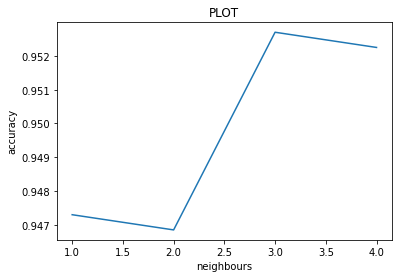

In [39]:
plt.plot(alpha, acc)
plt.xlabel('neighbours')
plt.ylabel('accuracy')
plt.title('PLOT')
plt.show()

In [ ]:
# def get_features():
#   """
#   Funtion to return a matrix of dimensions (number of tweets, number of chosen features)
#   Input parameters to this funcion are to be chosen as per requirement (Example: Loaded dataframe of the dataset) 
#   """
    
    
#   # your code here

Perform KNN using the vector obtained from get_features() function. Following are the steps to be followed:
1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values. 

In [ ]:
# your code here

## Part-2
Vectorize tweets based on the text. More details and reference links can be checked on the Tasks list in the start of the notebook

In [40]:
import nltk ,re 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()

In [41]:
temp = data['text']
sent_data = data['text']
# sent_data_test = x_test['text']
temp

0        RT @EdwardTHardy: The 7th US Circuit Court of ...
1        RT @VenomMovie: The world has enough superhero...
2        RT @FutbolBible: Teachers vs Students match &a...
3        RT @mashable: Someone from 'The Office' actual...
4        RT @_missj0hnson: Iâ€™m at Starbucks asking fo...
                               ...                        
11094    RT @AnnieOakley2015: @AVoiceForAllGA Following...
11095    RT @BillOReilly: What exactly is Donald Trump ...
11096    Paradoxically, your good intentions may stand ...
11097    RT @enblocibc: Less than 4 days to go for the ...
11098    The nature of being human is to be wired for c...
Name: text, Length: 11099, dtype: object

In [42]:
def remove_extras(text):
    stop_words = stopwords.words('english')
#     tokens = word_tokenize(text)
#     print(stop_words)
    
    text = re.sub(r"http\S+", "", text)
    text = text.lower()
    ans = word_tokenize(text)
    filtered_words = ""
    for word in ans:
        if word not in stop_words:
            filtered_words += word
            filtered_words += " "
    filtered_words = filtered_words[:-1]
    ans = " ".join(re.findall("[a-zA-Z]+", filtered_words))
#     print("Remove : ", ans)
    return ans

In [43]:
def lemmetization(refined_sentence):
    lemmatized = ""
#     print("refined_sentence", refined_sentence)
    refined_sentence = word_tokenize(refined_sentence)
#     print("after : ", refined_sentence)
    for word in refined_sentence:
        lemmatized += lemmatizer.lemmatize(word) + " "
#         print(word, lemmatizer.lemmatize(word))
#     print("Lemme : ", lemmatized)
    return lemmatized[:-1]

In [45]:
def tweet_clear(text):
  # your code here
#     text = "hello vectorizers i can here http://www.varun.com [varun] to get your work done[1].? corpora better rocks"
    text = remove_extras(text)
    text = lemmetization(text)
    return text

In [46]:

for i in range(len(sent_data)):
    sent_data.iloc[i] = tweet_clear(''.join(sent_data.iloc[i].split(":")[1:]))
    

C:\Users\varun\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [47]:
sent_data[0:5]

0    th u circuit court appeal upheld lower court r...
1     world enough superheroes watch new venom trailer
2              teacher v student match amp one teacher
3    someone the office actually responded netflix ...
4    i m starbucks asking soy milk man behind tryin...
Name: text, dtype: object

In [48]:
import sklearn
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
tfidf = TfidfVectorizer(stop_words='english')
output = tfidf.fit_transform(sent_data)

In [50]:
dic = {}
print(len(tfidf.vocabulary_))
for a,b in tfidf.vocabulary_.items():
    dic[b] = a

17679


In [51]:
tfidf.vocabulary_['got']

6035

In [52]:
from sklearn.neighbors import NearestNeighbors
def get_classifier(val, output):
    classifier = NearestNeighbors(n_neighbors=val)
    classifier.fit(output)
    return classifier

In [54]:
out = pd.DataFrame(output.todense(), columns=tfidf.get_feature_names())

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(out)
out = scaler.transform(out)

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
out = pca.fit_transform(out)

In [57]:
out.shape
train_tweet, test_tweet, y_t, y_te = train_test_split(out, y, test_size=.2, random_state = 6784)

In [60]:
accur = []
neigh = []
for val in range(1, 8):
    classifier = get_classifier(val, train_tweet)
    true_value = 0
    false_value = 0
    for test_range in range(len(test_tweet)):
        l1, l2 = classifier.kneighbors([train_tweet[test_range]])
        count0, count1 =0, 0
        for i in l2[0]:
            if int(y_t.iloc[i]) == 0:
                count0+=1
            elif int(y_t.iloc[i]) == 1:
                count1 += 1
                
        ans = 0
        if(count0 <= count1):
            ans = 1
        if(ans ==int(y_te.iloc[test_range])):
            true_value += 1
        else:
            false_value += 1
    accur.append(true_value/(true_value + false_value))
    neigh.append(val)
    print(f"accuracy for {val} neighbours : {true_value/(true_value + false_value)} true values : {true_value} total values : {true_value + false_value}")
    

accuracy for 1 neighbours : 0.8585585585585586 true values : 1906 total values : 2220
accuracy for 2 neighbours : 0.8112612612612613 true values : 1801 total values : 2220
accuracy for 3 neighbours : 0.8666666666666667 true values : 1924 total values : 2220
accuracy for 4 neighbours : 0.8481981981981982 true values : 1883 total values : 2220
accuracy for 5 neighbours : 0.8842342342342342 true values : 1963 total values : 2220
accuracy for 6 neighbours : 0.8729729729729729 true values : 1938 total values : 2220
accuracy for 7 neighbours : 0.8855855855855855 true values : 1966 total values : 2220


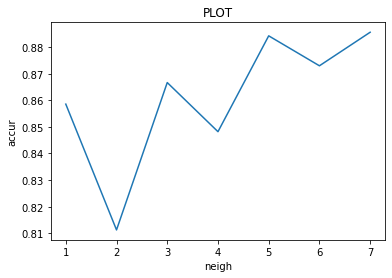

In [61]:
plt.plot(neigh, accur)
plt.ylabel('accur')
plt.xlabel('neigh')
plt.title('PLOT')
plt.show()

In [44]:
  """
  Funtion to return a matrix of dimensions (number of tweets, number of features extracted per tweet)
  Following are the steps for be followed:
    1. Remove links, tags and hashtags from each tweet.
    2. Apply TF-IDF on the tweets to extract a vector. 
    3. Perform dimensionality reduction on the obtained vector. 
  Input parameters to this funcion are to be chosen as per requirement (Example: Array of tweets) 
  """
# def tweet_vectoriser():
  # your code here
#     text = "hello vectorizers i can here http://www.varun.com [varun] to get your work done[1].? corpora better rocks"
#     text = remove_extras(text)
#     text = lemmetization(text)
#     return text

Perform KNN using the vector obtained from tweet_vectoriser() function. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [ ]:
# your code here

## Part-3
### Subpart-1

Combine both the vectors obtained from the tweet_vectoriser() and get_features()

In [62]:
# your code here
print(type(X), type(out))
X_df = pd.DataFrame(X)
out_df = pd.DataFrame(out)
print(len(X_df), len(out_df))
print(X_df.shape, out_df.shape)
out_df.info()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
11099 11099
(11099, 7) (11099, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       11099 non-null  float64
 1   1       11099 non-null  float64
 2   2       11099 non-null  float64
 3   3       11099 non-null  float64
 4   4       11099 non-null  float64
 5   5       11099 non-null  float64
 6   6       11099 non-null  float64
 7   7       11099 non-null  float64
 8   8       11099 non-null  float64
 9   9       11099 non-null  float64
 10  10      11099 non-null  float64
 11  11      11099 non-null  float64
 12  12      11099 non-null  float64
 13  13      11099 non-null  float64
 14  14      11099 non-null  float64
 15  15      11099 non-null  float64
 16  16      11099 non-null  float64
 17  17      11099 non-null  float64
 18  18      11099 non-null  float64
 19  19      11099 non-null  fl

In [63]:
x_concat = pd.concat([out_df, X_df], axis=1)
# x_concat.shape
x_concat.iloc[0]

0     -0.099674
1     -0.432551
2      0.366855
3     -0.258269
4     -0.651926
5     -1.130576
6     -0.345455
7     -0.713796
8     -0.036016
9     -1.336328
10    -0.412857
11     0.138653
12     1.333019
13    -0.840750
14    -0.500693
15    -1.394898
16     0.016755
17     0.792292
18    -0.165448
19    -1.852744
20    -1.079983
21     2.654705
22    -0.467296
23    -1.256360
24     0.367792
25     1.840692
26     0.678668
27     2.253089
28    -5.350201
29     0.280580
30    -3.953112
31    -0.148206
32    -6.123081
33    -5.352059
34    -0.343206
35    -2.716962
36     1.469756
37    -1.148271
38    -4.604800
39    -0.300079
40    -2.625694
41    -7.220948
42    -3.096568
43    -4.342295
44    -7.552628
45     9.534119
46     0.743701
47    -1.315527
48    13.292078
49    -4.687282
0     -0.218805
1     -0.029091
2     -0.154119
3     -0.156967
4      0.346677
5     -0.126569
6     -0.038908
Name: 0, dtype: float64

In [64]:
# your code here
from sklearn.model_selection import train_test_split
x_train_con, x_test_con, y_train_con, y_test_con = train_test_split(x_concat, y, test_size=.2, random_state = 6784, stratify=y)

In [65]:
len(x_train_con), len(y_train_con)
from sklearn.neighbors import NearestNeighbors
classifier = NearestNeighbors(n_neighbors=5)
classifier.fit(x_concat)

NearestNeighbors()

In [66]:
x_concat.shape, y.shape, x_test_con.shape

((11099, 57), (11099, 1), (2220, 57))

In [67]:
accur = []
neigh = []
for val in range(1, 8):
    classifier = NearestNeighbors(n_neighbors=val)
    classifier.fit(x_concat, y)
    true_value = 0
    false_value = 0
    for test_range in range(len(x_test_con)):
        l1, l2 = classifier.kneighbors([x_test_con.iloc[test_range]])
        count0, count1 =0, 0
        for i in l2[0]:
            if int(y.iloc[i]) == 0:
                count0+=1
            elif int(y.iloc[i]) == 1:
                count1 += 1
                
        ans = 0
        if(count0 <= count1):
            ans = 1
        if(ans ==int(y_test_con.iloc[test_range])):
            true_value += 1
        else:
            false_value += 1
    accur.append(true_value/(true_value + false_value))
    neigh.append(val)
    print(f"accuracy for {val*100} neighbours : {true_value/(true_value + false_value)} true values : {true_value} total values : {true_value + false_value}")
    

accuracy for 1 neighbours : 1.0 true values : 2220 total values : 2220
accuracy for 2 neighbours : 0.9617117117117117 true values : 2135 total values : 2220
accuracy for 3 neighbours : 0.9675675675675676 true values : 2148 total values : 2220
accuracy for 4 neighbours : 0.9621621621621622 true values : 2136 total values : 2220
accuracy for 5 neighbours : 0.9567567567567568 true values : 2124 total values : 2220
accuracy for 6 neighbours : 0.9554054054054054 true values : 2121 total values : 2220
accuracy for 7 neighbours : 0.9540540540540541 true values : 2118 total values : 2220


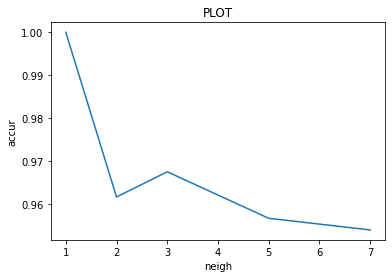

In [68]:
plt.plot(neigh, accur)
plt.ylabel('accur')
plt.xlabel('neigh')
plt.title('PLOT')
plt.show()

Perform KNN using the vector obtained in the previous step. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [ ]:
# your code here

### Subpart-2

Explain the differences between the accuracies obtained in each part above based on the features used.

Achieved the highest accuracy in the third part when both the features and tweets were combined as there we have more information to train on and hence we got the best accuarcy.
In first part i used 7 columns only as they seemed to be the best containing the useful information and achieved upto 95% accuracy there, then in the second part i received around 90 accuracy by removing all unuseful words and converting to root words using lemmetization etc.